In [54]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import datetime as datetime

In [55]:
df = pd.read_csv('sources/NBA_players_2015.csv')
df2 = pd.read_csv('sources/nba.csv')
df3 = pd.read_csv('sources/NBA_Team_IDs.csv')
df.head()

,Unnamed: 0,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [56]:
df2.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [57]:
df3.head()

,Season,League,BBRef_Team_Name,BBRef_Team_Abbreviation,Current_BBRef_Team_Name,Current_BBRef_Team_Abbreviation,ESPN_Current_Link_ID,NBA_Current_Link_ID,Spotrac_Current_Link_ID
0,2019,NBA,Atlanta Hawks,ATL,Atlanta Hawks,ATL,ATL,1610612737,atlanta-hawks
1,2018,NBA,Atlanta Hawks,ATL,Atlanta Hawks,ATL,ATL,1610612737,atlanta-hawks
2,2017,NBA,Atlanta Hawks,ATL,Atlanta Hawks,ATL,ATL,1610612737,atlanta-hawks
3,2016,NBA,Atlanta Hawks,ATL,Atlanta Hawks,ATL,ATL,1610612737,atlanta-hawks
4,2015,NBA,Atlanta Hawks,ATL,Atlanta Hawks,ATL,ATL,1610612737,atlanta-hawks


In [58]:
#Dimension of the season stats
df.shape

(478, 50)

In [59]:
#Dimension of the player stats
df2.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [60]:
df2.shape

(458, 9)

In [62]:
df2["Salary"] = df2['Salary'].fillna(0)

In [63]:
df2.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,0.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [64]:
df3 = df3.drop(df3.columns[[0, 1, 4, 5, 6, 7, 8]], axis=1)

In [66]:
data_df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [67]:
data_df.shape

(366, 9)

In [68]:
df3.head()

,BBRef_Team_Name,BBRef_Team_Abbreviation
0,Atlanta Hawks,ATL
1,Atlanta Hawks,ATL
2,Atlanta Hawks,ATL
3,Atlanta Hawks,ATL
4,Atlanta Hawks,ATL


In [69]:
df3.shape

(1545, 2)

In [70]:
#Check column names
df.columns

Index(['Unnamed: 0', 'season_end', 'player', 'pos', 'age', 'bref_team_id', 'g',
       'gs', 'mp', 'fg', 'fga', 'fg_', 'x3p', 'x3pa', 'x3p_', 'x2p', 'x2pa',
       'x2p_', 'ft', 'fta', 'ft_', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [71]:
# joined_df = data_df.set_index('Team'),df3.set_index('BBRef_Team_Name')], axis=1)
joined_df = pd.merge(data_df, df3,  how='left', left_on=['Team'], right_on = ['BBRef_Team_Name'])


In [72]:
joined_df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,BBRef_Team_Name,BBRef_Team_Abbreviation
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
1,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
2,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
3,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
4,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS


In [73]:
joined_df.shape


(14937, 11)

In [93]:
data2.head()

Name             Team                  
Aaron Gordon     Orlando Magic              4171680.0
Aaron Harrison   Charlotte Hornets           525093.0
Adreian Payne    Minnesota Timberwolves     1938840.0
Al Horford       Atlanta Hawks             12000000.0
Al-Farouq Aminu  Portland Trail Blazers     8042895.0
Name: Salary, dtype: float64

In [96]:
data2.shape

(366,)

In [97]:
data2.head()

Name             Team                  
Aaron Gordon     Orlando Magic              4171680.0
Aaron Harrison   Charlotte Hornets           525093.0
Adreian Payne    Minnesota Timberwolves     1938840.0
Al Horford       Atlanta Hawks             12000000.0
Al-Farouq Aminu  Portland Trail Blazers     8042895.0
Name: Salary, dtype: float64

In [14]:
joined_df[['Salary']] = joined_df[['Salary']].fillna(value=0)

In [15]:
joined_df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Season,League,BBRef_Team_Name,BBRef_Team_Abbreviation,Current_BBRef_Team_Name,Current_BBRef_Team_Abbreviation,ESPN_Current_Link_ID,NBA_Current_Link_ID,Spotrac_Current_Link_ID
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2019,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics
1,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2018,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics
2,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2017,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics
3,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2016,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics
4,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2015,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics


In [76]:
joined_df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,BBRef_Team_Name,BBRef_Team_Abbreviation
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
1,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
2,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
3,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
4,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS


In [17]:
data3 = joined_df.sort_values(['Salary'],ascending=False)

In [128]:
joined_df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,BBRef_Team_Name,BBRef_Team_Abbreviation
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
1,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
2,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
3,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
4,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS


In [182]:
#filter on a specific state
type(data3)


pandas.core.frame.DataFrame

In [154]:
#Create cut bins
mybins=[25,35,45,55,65,75,85,100]
withRange = pd.DataFrame(data3,columns = ['Name','Team','Age','College','Salary'])
withRange.head()
withRange.dropna()

,Name,Team,Age,College,Salary
13497,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
13490,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
13491,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
13492,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
13494,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
...,...,...,...,...,...
150,John Holland,Boston Celtics,27.0,Boston University,0.0
151,John Holland,Boston Celtics,27.0,Boston University,0.0
152,John Holland,Boston Celtics,27.0,Boston University,0.0
153,John Holland,Boston Celtics,27.0,Boston University,0.0


In [155]:
withRange.head()

,Name,Team,Age,College,Salary
9908,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0
9871,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0
9882,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0
9880,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0
9879,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0


In [156]:
withRange.dropna()

,Name,Team,Age,College,Salary
13497,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
13490,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
13491,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
13492,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
13494,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
...,...,...,...,...,...
150,John Holland,Boston Celtics,27.0,Boston University,0.0
151,John Holland,Boston Celtics,27.0,Boston University,0.0
152,John Holland,Boston Celtics,27.0,Boston University,0.0
153,John Holland,Boston Celtics,27.0,Boston University,0.0


In [157]:
withRange['Age'] = withRange['Age'].astype(int)

In [159]:
withRange.dropna()

,Name,Team,Age,College,Salary
13497,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0
13490,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0
13491,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0
13492,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0
13494,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0
...,...,...,...,...,...
150,John Holland,Boston Celtics,27,Boston University,0.0
151,John Holland,Boston Celtics,27,Boston University,0.0
152,John Holland,Boston Celtics,27,Boston University,0.0
153,John Holland,Boston Celtics,27,Boston University,0.0


In [158]:
withRange.head()

,Name,Team,Age,College,Salary
9908,Dwight Howard,Houston Rockets,30,NaN,22359364.0
9871,Dwight Howard,Houston Rockets,30,NaN,22359364.0
9882,Dwight Howard,Houston Rockets,30,NaN,22359364.0
9880,Dwight Howard,Houston Rockets,30,NaN,22359364.0
9879,Dwight Howard,Houston Rockets,30,NaN,22359364.0


In [161]:
mylabels=['19-21', '22-24', '25-27', '28-30']
# Use the .cut method to create a new variable using those cut points and labels.
# data4['Range']=pd.cut(data3['Age'], bins=mybins, labels=mylabels)
# withRange['age_range']=pd.cut(withRange['Age'], bins=mybins, labels=mylabels)
# withRange.info
bins= [19,22,25,28,30]
withRange['age_range'] = pd.cut(withRange['Age'], bins=bins,labels=mylabels, right=False)

In [164]:
withRange.dropna()

,Name,Team,Age,College,Salary,age_range
13497,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,25-27
13490,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,25-27
13491,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,25-27
13492,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,25-27
13494,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,25-27
...,...,...,...,...,...,...
150,John Holland,Boston Celtics,27,Boston University,0.0,25-27
151,John Holland,Boston Celtics,27,Boston University,0.0,25-27
152,John Holland,Boston Celtics,27,Boston University,0.0,25-27
153,John Holland,Boston Celtics,27,Boston University,0.0,25-27


In [162]:
withRange.head()

,Name,Team,Age,College,Salary,age_range
9908,Dwight Howard,Houston Rockets,30,NaN,22359364.0,NaN
9871,Dwight Howard,Houston Rockets,30,NaN,22359364.0,NaN
9882,Dwight Howard,Houston Rockets,30,NaN,22359364.0,NaN
9880,Dwight Howard,Houston Rockets,30,NaN,22359364.0,NaN
9879,Dwight Howard,Houston Rockets,30,NaN,22359364.0,NaN


In [150]:
withRange.dropna()

,Name,Team,Age,College,Salary,age_range
13497,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,"[27, 29)"
13490,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,"[27, 29)"
13491,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,"[27, 29)"
13492,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,"[27, 29)"
13494,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,"[27, 29)"
...,...,...,...,...,...,...
150,John Holland,Boston Celtics,27,Boston University,0.0,"[27, 29)"
151,John Holland,Boston Celtics,27,Boston University,0.0,"[27, 29)"
152,John Holland,Boston Celtics,27,Boston University,0.0,"[27, 29)"
153,John Holland,Boston Celtics,27,Boston University,0.0,"[27, 29)"


In [151]:
withRange.head()

,Name,Team,Age,College,Salary,age_range
9908,Dwight Howard,Houston Rockets,30,NaN,22359364.0,NaN
9871,Dwight Howard,Houston Rockets,30,NaN,22359364.0,NaN
9882,Dwight Howard,Houston Rockets,30,NaN,22359364.0,NaN
9880,Dwight Howard,Houston Rockets,30,NaN,22359364.0,NaN
9879,Dwight Howard,Houston Rockets,30,NaN,22359364.0,NaN


In [165]:
withRange.dropna()

,Name,Team,Age,College,Salary,age_range
13497,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,25-27
13490,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,25-27
13491,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,25-27
13492,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,25-27
13494,Kevin Durant,Oklahoma City Thunder,27,Texas,20158622.0,25-27
...,...,...,...,...,...,...
150,John Holland,Boston Celtics,27,Boston University,0.0,25-27
151,John Holland,Boston Celtics,27,Boston University,0.0,25-27
152,John Holland,Boston Celtics,27,Boston University,0.0,25-27
153,John Holland,Boston Celtics,27,Boston University,0.0,25-27


In [166]:
print(withRange.iloc[10000:10010])

                Name               Team  Age College     Salary age_range
10222  Jarell Martin  Memphis Grizzlies   22     LSU  1230840.0     22-24
10224  Jarell Martin  Memphis Grizzlies   22     LSU  1230840.0     22-24
10223  Jarell Martin  Memphis Grizzlies   22     LSU  1230840.0     22-24
10221  Jarell Martin  Memphis Grizzlies   22     LSU  1230840.0     22-24
10220  Jarell Martin  Memphis Grizzlies   22     LSU  1230840.0     22-24
10237  Jarell Martin  Memphis Grizzlies   22     LSU  1230840.0     22-24
10236  Jarell Martin  Memphis Grizzlies   22     LSU  1230840.0     22-24
10235  Jarell Martin  Memphis Grizzlies   22     LSU  1230840.0     22-24
10234  Jarell Martin  Memphis Grizzlies   22     LSU  1230840.0     22-24
10219  Jarell Martin  Memphis Grizzlies   22     LSU  1230840.0     22-24


In [167]:
withRange.tail

<bound method NDFrame.tail of                 Name               Team  Age            College      Salary  \
9908   Dwight Howard    Houston Rockets   30                NaN  22359364.0   
9871   Dwight Howard    Houston Rockets   30                NaN  22359364.0   
9882   Dwight Howard    Houston Rockets   30                NaN  22359364.0   
9880   Dwight Howard    Houston Rockets   30                NaN  22359364.0   
9879   Dwight Howard    Houston Rockets   30                NaN  22359364.0   
...              ...                ...  ...                ...         ...   
150     John Holland     Boston Celtics   27  Boston University         0.0   
151     John Holland     Boston Celtics   27  Boston University         0.0   
152     John Holland     Boston Celtics   27  Boston University         0.0   
153     John Holland     Boston Celtics   27  Boston University         0.0   
10178  Jordan Farmar  Memphis Grizzlies   29               UCLA         0.0   

      age_range  
990

In [138]:
print(withRange.tail)

<bound method NDFrame.tail of                 Name               Team  Age            College      Salary  \
9908   Dwight Howard    Houston Rockets   30                NaN  22359364.0   
9871   Dwight Howard    Houston Rockets   30                NaN  22359364.0   
9882   Dwight Howard    Houston Rockets   30                NaN  22359364.0   
9880   Dwight Howard    Houston Rockets   30                NaN  22359364.0   
9879   Dwight Howard    Houston Rockets   30                NaN  22359364.0   
...              ...                ...  ...                ...         ...   
150     John Holland     Boston Celtics   27  Boston University         0.0   
151     John Holland     Boston Celtics   27  Boston University         0.0   
152     John Holland     Boston Celtics   27  Boston University         0.0   
153     John Holland     Boston Celtics   27  Boston University         0.0   
10178  Jordan Farmar  Memphis Grizzlies   29               UCLA         0.0   

      age_range  
990

In [127]:
print(withRange['Age'].unique())

[30 27 28 26 24 29 23 25 22 21 20 19]


In [116]:
print(withRange.columns.tolist())

['Name', 'Team', 'Age', 'College', 'Salary', 'age_range']


In [118]:
withRange.dropna()

,Name,Team,Age,College,Salary,age_range
13497,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0,25-27
13490,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0,25-27
13491,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0,25-27
13492,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0,25-27
13494,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0,25-27
...,...,...,...,...,...,...
150,John Holland,Boston Celtics,27.0,Boston University,0.0,25-27
151,John Holland,Boston Celtics,27.0,Boston University,0.0,25-27
152,John Holland,Boston Celtics,27.0,Boston University,0.0,25-27
153,John Holland,Boston Celtics,27.0,Boston University,0.0,25-27


In [119]:
withRange.head()

,Name,Team,Age,College,Salary,age_range
9908,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0,25-27
9871,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0,25-27
9882,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0,25-27
9880,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0,25-27
9879,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0,25-27


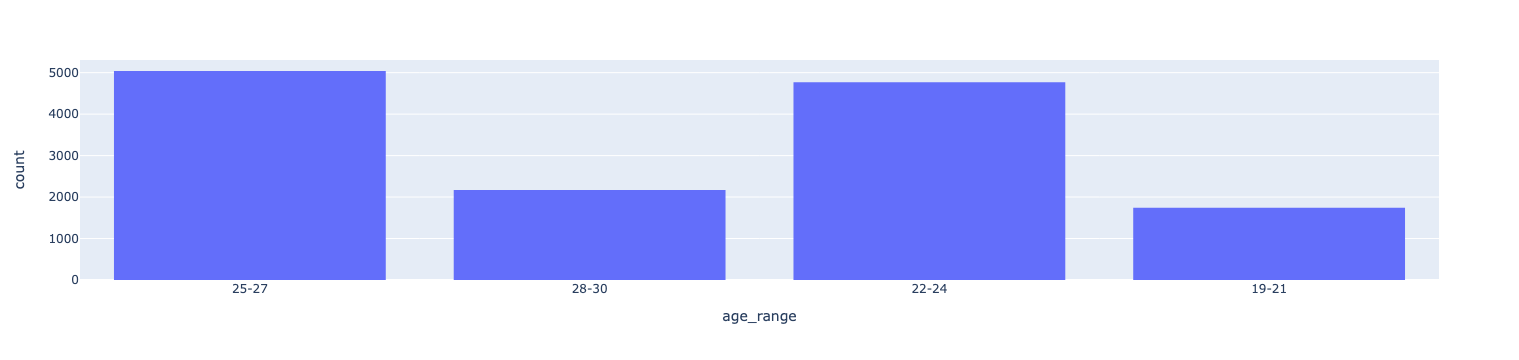

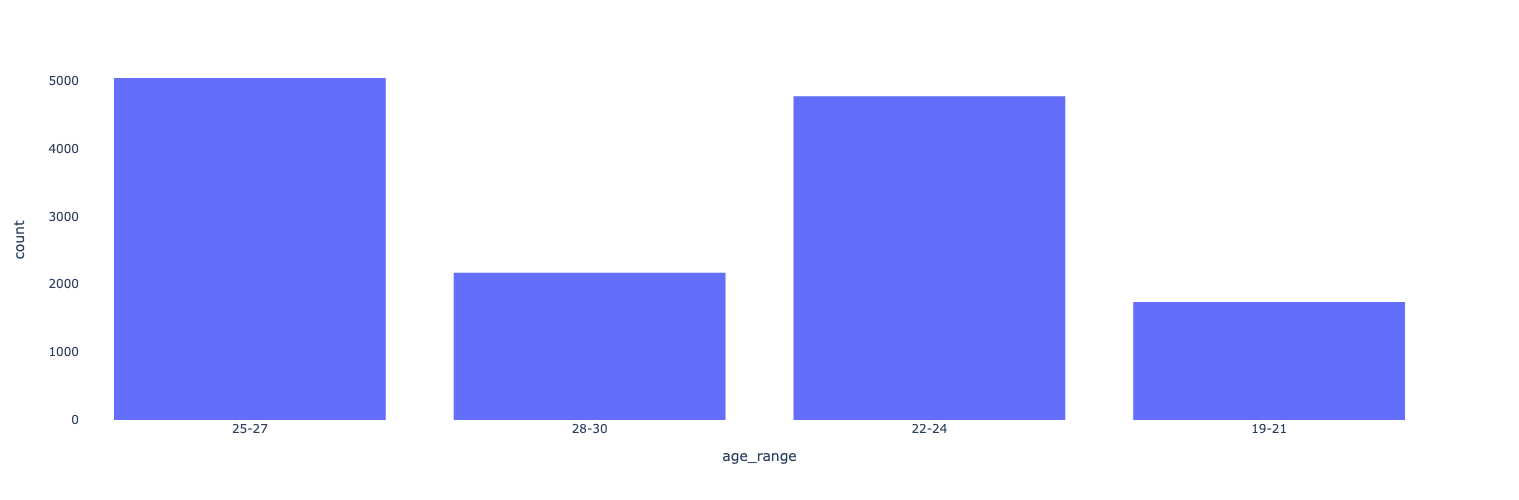

In [170]:
mycolorscale = 'Sunset' # Note: The error message will list possible color scales.
color_discrete_sequence = ['#3264A8','#A83232']
fig = px.histogram(withRange, x="age_range", nbins=7)
fig.show()

In [ ]:
df.head()

,Unnamed: 0,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2
